In [22]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [7]:
# Loading dataset into a data frame
import pandas as pd
df = pd.read_excel(r'C:\Users\Omar Issa\Desktop\titanic3.xls')

print(df.head())
print(df.info())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

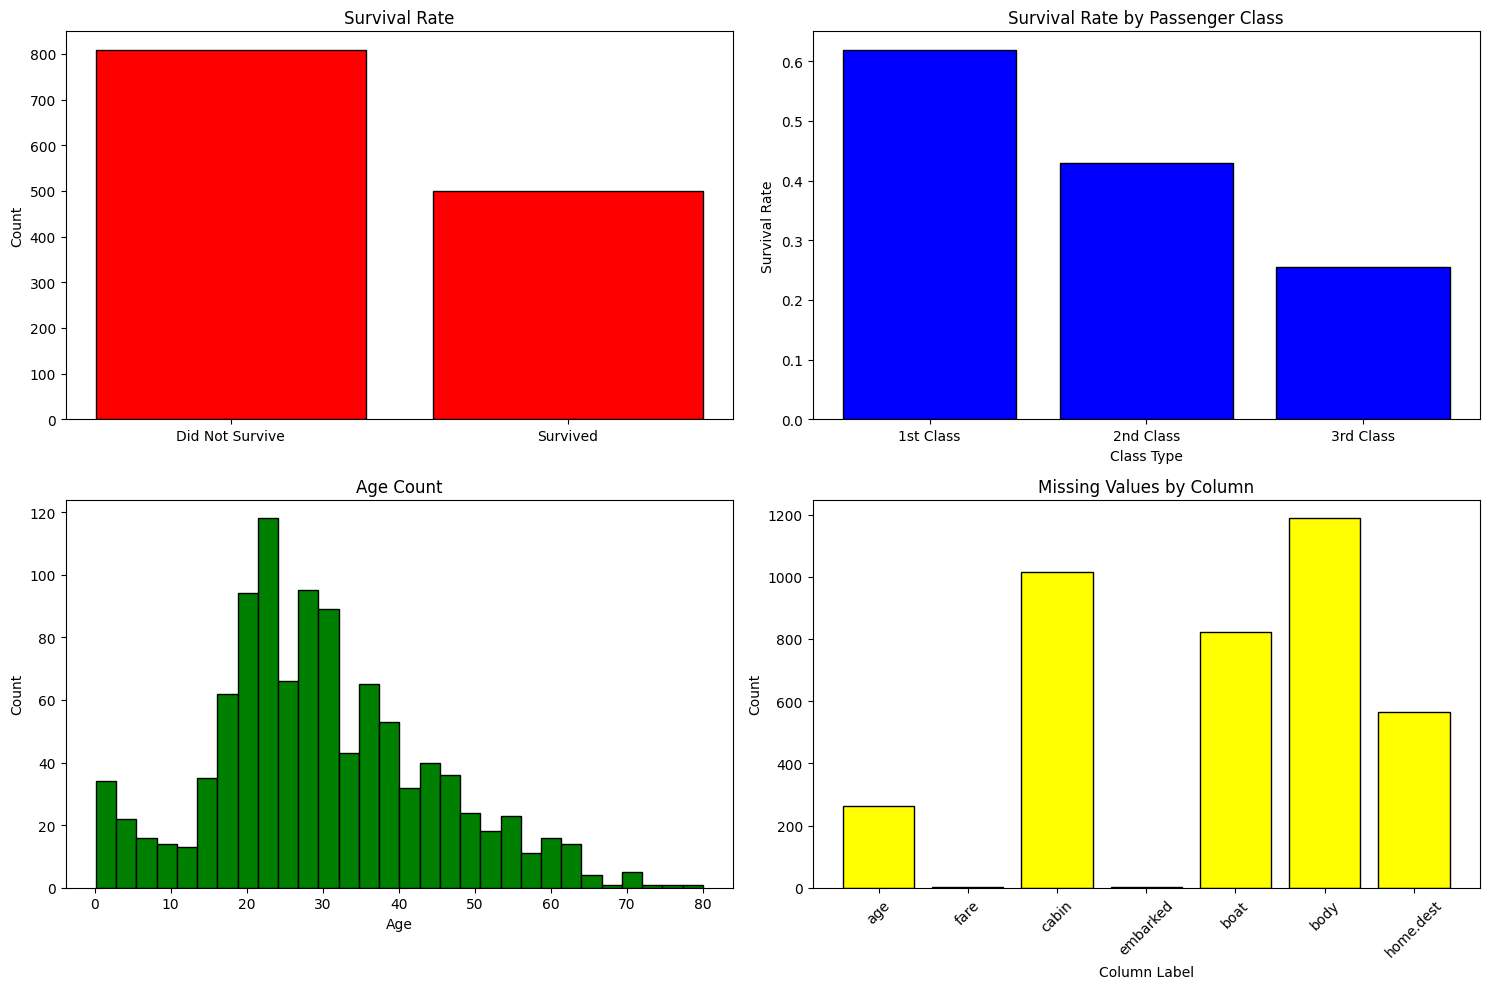

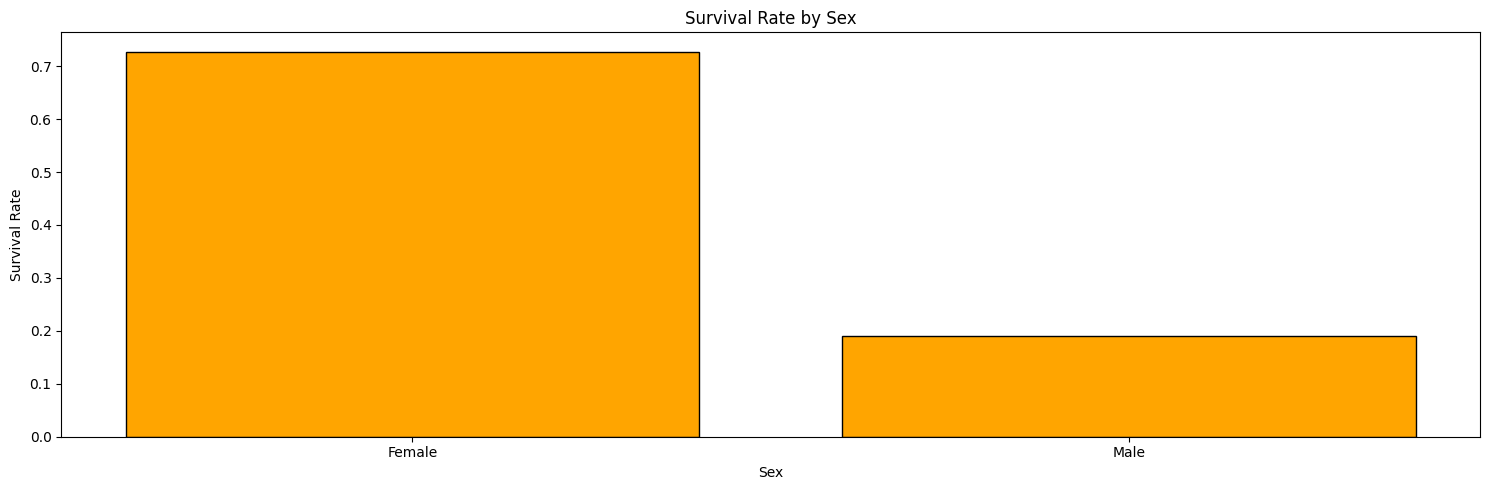

In [71]:
# Task 1:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))

# 1. Survival Distribution
plt.subplot(2, 2, 1)
survival_counts = df['survived'].value_counts()
plt.bar(['Did Not Survive', 'Survived'], [survival_counts[0], survival_counts[1]], color = 'red', edgecolor='black')
plt.title('Survival Rate')
plt.ylabel('Count')

# 2. Survival by Passenger Class
plt.subplot(2, 2, 2)
survival_by_class = df.groupby('pclass')['survived'].mean()
plt.bar(['1st Class', '2nd Class', '3rd Class'], survival_by_class, color = 'blue', edgecolor = 'black')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class Type')

# 3. Age Distribution
plt.subplot(2, 2, 3)
plt.hist(df['age'].dropna(), bins=30, color = 'green', edgecolor='black')
plt.title('Age Count')
plt.xlabel('Age')
plt.ylabel('Count')

# 4. Missing Values
plt.subplot(2, 2, 4)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
plt.bar(range(len(missing_values)), missing_values.values, color = 'yellow', edgecolor='black')
plt.xticks(range(len(missing_values)), missing_values.index, rotation=45)
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.xlabel('Column Label')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# 5. Survival by Sex

survival_by_sex = df.groupby('sex')['survived'].mean()
plt.bar(['Female', 'Male'], survival_by_sex, color = 'orange', edgecolor='black')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')

plt.tight_layout()
plt.show()

"""
Reasoning behind plots:

- Plot 1: Survival rate bar chart was used for me to understand who survived and who didn't.
- Plot 2: Passenger class survival rate could see the difference in survival rates per class, potentially indicating useful correlations.
- Plot 3: Age count histogram allowed me to the distribution of ages to understand if the passengers were young or old. This could aid in defining the 
  passenger's physical health in general.
- Plot 4: Missing values is important so I can gain insight into which columns need their data cleaned.
- Plot 5: The sex survival rate plot is important to show the disparity in how females vs males survived, as historically females were allowed to board
  the rescue boats before men. Hence, the disparity in survival rate.

"""


In [79]:
#Task 2:

df_clean = df.copy()

# 1. Handle 'embarked':
# Strategy: Fill with most common port
most_common_port = df_clean['embarked'].mode()[0]
df_clean['embarked'] = df_clean['embarked'].fillna(most_common_port)

# 2. Handle 'age':
# Strategy: Convert age to numeric values and fill missing age values with median age
median_age = df_clean['age'].median()
df_clean['age'] = df_clean['age'].fillna(median_age)

# 3. Handle 'cabin':
# Strategy: Create deck feature from first letter, then drop cabin
df_clean['deck'] = df_clean['cabin'].str[0]
df_clean['deck'] = df_clean['deck'].fillna('Unknown')

# 4. Handle 'fare':
# Strategy: Fill the missing value with the median
median_fares = df_clean.groupby('pclass')['fare'].median()
for pclass, median_fare in median_fares.items():
    mask = df_clean['pclass'] == pclass
    df_clean.loc[mask, 'fare'] = df_clean.loc[mask, 'fare'].fillna(median_fare)

# 5. Handling 'sibsp' and 'parch':
# Strategy: count the number of siblings or parents the individual has. If there is none (i.e. family_size is one, then the person is counted as alone)
df_clean['family_size'] = df_clean['sibsp'] + df_clean['parch'] + 1
df_clean['is_alone'] = (df_clean['family_size'] == 1).astype(int)

# 6. Handling 'name':
# Strategy: Extract the title of the individuals and then drop the names.
df_clean['title'] = df_clean['name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Standardizing titles
title_mapping = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady': 'Mrs', 'Countess': 'Mrs', 'Dona': 'Mrs',
    'Sir': 'Mr', 'Don': 'Mr', 'Jonkheer': 'Mr',
    'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer',
    'Dr': 'Officer', 'Rev': 'Officer'
}
df_clean['title'] = df_clean['title'].map(title_mapping).fillna(df_clean['title'])

# Dropping columns that aren't needed for prediction
# The columns below were dropped because
columns_to_drop = ['ticket', 'cabin', 'boat', 'body', 'home.dest', 'sibsp', 'parch', 'name']
df_clean = df_clean.drop(columns=columns_to_drop)

print("\nColumns dropped after Task 2:")
print(columns_to_drop)
print("\nFinal columns after Task 2:")
print(df_clean.columns.tolist())



Columns dropped after Task 2:
['ticket', 'cabin', 'boat', 'body', 'home.dest', 'sibsp', 'parch', 'name']

Final columns after Task 2:
['pclass', 'survived', 'sex', 'age', 'fare', 'embarked', 'deck', 'family_size', 'is_alone', 'title']


In [86]:
# Task 3: 

# Categorical features identified after task 2
categorical_features = ['pclass', 'sex', 'embarked', 'deck', 'title']

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df_clean[categorical_features])

# Getting feature names for encoded columns
feature_names = []
for i, feature in enumerate(categorical_features):
    categories = encoder.categories_[i][1:]  
    feature_names.extend([f"{feature}_{cat}" for cat in categories])

# Creating a DataFrame with encoded features
encoded_df = pd.DataFrame(
    encoded_features, 
    columns=feature_names,
    index=df_clean.index
)

# Combining with non-categorical columns
df_encoded = pd.concat([
    df_clean[['survived', 'age', 'fare', 'family_size', 'is_alone']], 
    encoded_df
], axis=1)

print("\nColumns after encoding:")
print(df_encoded.columns.tolist())


Columns after encoding:
['survived', 'age', 'fare', 'family_size', 'is_alone', 'pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'deck_Unknown', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Officer']


In [89]:
# Task 4: 

from sklearn.preprocessing import StandardScaler, MinMaxScaler

numerical_features = ['age', 'fare', 'family_size', 'is_alone']

# Creating copies for different scaling methods
df_standard = df_encoded.copy()
df_minmax = df_encoded.copy()

# StandardScaler for standardization of numerical features (mean=0, std=1)
scaler_standard = StandardScaler()
df_standard[numerical_features] = scaler_standard.fit_transform(df_standard[numerical_features])

# MinMaxScaler for normalization of numerical features (scale to [0,1])
scaler_minmax = MinMaxScaler()
df_minmax[numerical_features] = scaler_minmax.fit_transform(df_minmax[numerical_features])

# Displaying Results
print("\nSample of StandardScaler results:")
print(df_standard[numerical_features].head())
print("\nSample of MinMaxScaler results:")
print(df_minmax[numerical_features].head())


Sample of StandardScaler results:
        age      fare  family_size  is_alone
0 -0.039005  3.442540    -0.558346  0.810532
1 -2.215952  2.286641     1.336749 -1.233758
2 -2.131977  2.286641     1.336749 -1.233758
3  0.038512  2.286641     1.336749 -1.233758
4 -0.349075  2.286641     1.336749 -1.233758

Sample of MinMaxScaler results:
        age      fare  family_size  is_alone
0  0.361169  0.412503          0.0       1.0
1  0.009395  0.295806          0.3       0.0
2  0.022964  0.295806          0.3       0.0
3  0.373695  0.295806          0.3       0.0
4  0.311064  0.295806          0.3       0.0


In [90]:
# Task 5: Data Splitting
from sklearn.model_selection import train_test_split

# Separate test set
X = df_encoded.drop('survived', axis=1)  # Features
y = df_encoded['survived']               # Target (whether person survived or did not survive)

# First split: divinding data into training (%80) + validation (%20)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 8)

# Second split: dividing training (%70) + validation (%30)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, stratify=y_train_val, random_state = 8)

print("Training distribution:\n", y_train.value_counts(normalize=True))
print("Validation distribution:\n", y_val.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))


Training distribution:
 survived
0    0.617486
1    0.382514
Name: proportion, dtype: float64
Validation distribution:
 survived
0    0.619048
1    0.380952
Name: proportion, dtype: float64
Test distribution:
 survived
0    0.618321
1    0.381679
Name: proportion, dtype: float64


In [91]:
# Task 6:
from imblearn.over_sampling import SMOTE

# Checking the imbalance
print("Imbalance in training data:")
print(y_train.value_counts())
print("\nTraining set shape before SMOTE:", X_train.shape) 

# Fixing the imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train) 

# Results after using SMOTE
print("\nTraining set shape after SMOTE:", X_resampled.shape)
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

Imbalance in training data:
survived
0    452
1    280
Name: count, dtype: int64

Training set shape before SMOTE: (732, 21)

Training set shape after SMOTE: (904, 21)

Class distribution after SMOTE:
survived
1    452
0    452
Name: count, dtype: int64


Variances of features:
age: 171.5266
fare: 2634.5896
family_size: 1.9703
is_alone: 0.2439
pclass_2: 0.1697
pclass_3: 0.2469
sex_male: 0.2320
embarked_Q: 0.0866
embarked_S: 0.2035
deck_B: 0.0390
deck_C: 0.0711
deck_D: 0.0277
deck_E: 0.0387
deck_F: 0.0167
deck_G: 0.0059
deck_Unknown: 0.1789
title_Miss: 0.1686
title_Mr: 0.2426
title_Mrs: 0.1365
title_Officer: 0.0194

Features with variance > 0.01:
['age', 'fare', 'family_size', 'is_alone', 'pclass_2', 'pclass_3', 'sex_male', 'embarked_Q', 'embarked_S', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_Unknown', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Officer']

Shape before variance threshold: (904, 20)

Shape after variance threshold: (904, 19)


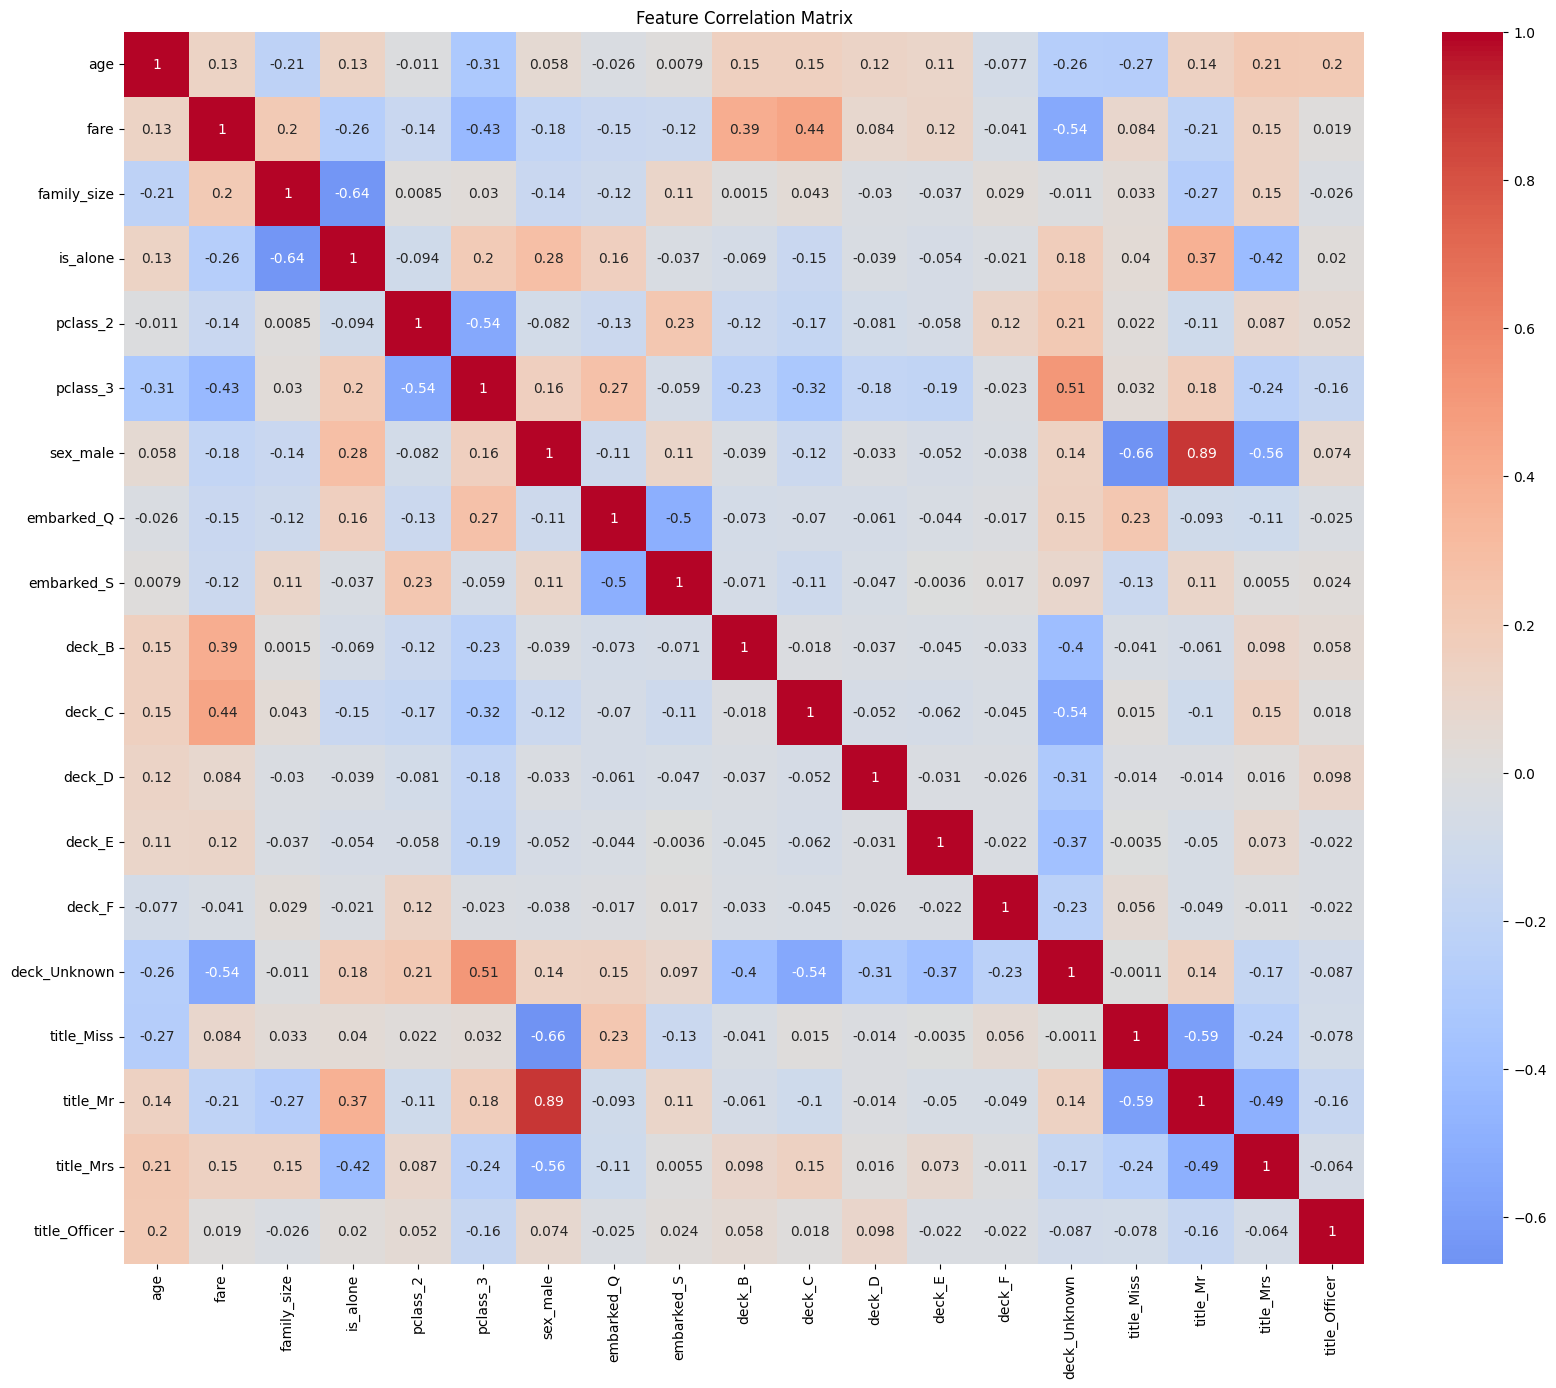

" \nRemarks on Correlation Matrix: \n\n- The model indicates no really strong correlation between multiple features. That is why no features were dropped.\n\n- Even though there is a strong correlation between 'is_family' and 'is_alone' at (-0.64), after testing, the model was found to be more accurate in \n  predicting the results by keeping both features in the model.\n \n"

In [98]:
# Task 7:

import seaborn as sns
from sklearn.feature_selection import VarianceThreshold

variances = X_resampled.var()
print("Variances of features:")
for feature, variance in variances.items():
    print(f"{feature}: {variance:.4f}")

# Apply variance threshold
threshold = 0.01
selector = VarianceThreshold(threshold)
X_selected = selector.fit_transform(X_resampled)

# Display results after low variance features were dropped
selected_features = X_resampled.columns[selector.get_support()].tolist()
print("\nFeatures with variance > 0.01:")
print(selected_features)
print("\nShape before variance threshold:", X_resampled.shape)
print("\nShape after variance threshold:", X_selected.shape)

""" 
Remarks on variance: 

- A low variance threshold was set at (0.01) which is what I found online is commonly used to determine low variance.

- 'deck_t' and 'deck_g' were removed for being below the variance threshold.
 
"""

X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
corr = X_selected_df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot = True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

threshold = 0.8
high_corr_features = np.where(np.abs(corr) > threshold)

""" 
Remarks on Correlation Matrix: 

- The model indicates no really strong correlation between multiple features. That is why no features were dropped.

- Even though there is a strong correlation between 'is_family' and 'is_alone' at (-0.64), after testing, the model was found to be more accurate in 
  predicting the results by keeping both features in the model.
 
"""

In [101]:
#Task 8:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression(random_state=8)

# Training the model on the data that has low variance features removed
lr_model.fit(X_selected, y_resampled)
selector_val = VarianceThreshold(threshold=0.01)
X_val_no_name = X_val.drop('name', axis=1)
X_val_selected = selector_val.fit_transform(X_val_no_name)

# Getting predictions
y_pred = lr_model.predict(X_val_selected)

# Results
print("Classification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))



C:\Users\Omar Issa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyError: "['name'] not found in axis"